### IDs:
Insert yours IDs to the cell below

ID #1:301315040

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [34]:
# X ~ NBinom(r,p); the number of sample needed in order to see r successes (i.e. r defective products)
# each product sample is a Bernoulli(p);
# in 1.A & 1.b, since r=1 => X ~ Geo(p)


def num_indp_sample_needed(r, p_defective, probability):
    """ We are looking for the first integer x in [r,inf) that holds CDF(x)>=probability 

        Returns: ( X~NBinom(r,p), the number of samples that holds the probability requirement )
    """
    X = stats.nbinom(r, p_defective, loc=r)
    i = 0
    EX = round(X.mean())
    while True:
        possible_Xs = range(max(r, i*EX), (i+1)*EX) # we sample Xs from [max(r, iE(X)), (i+1)E(X)] (i is a positive integer)
        cdf_values = X.cdf(possible_Xs)
        if np.all(cdf_values<probability):
            i = i + 1
        else:
            return X, possible_Xs[np.argmax(cdf_values>=probability)]

def print_Q1_res(n_samples, probability, r_defective_items):
    print(f'We need to sample {n_samples} independent samples in order to have '
          f'{round(probability*100)}% of having at least {r_defective_items} defective product.')

In [35]:
r = 1
p1x = 0.03
prob1 = 0.85

_, n_samples1A = num_indp_sample_needed(r, p1x, prob1)
print_Q1_res(n_samples1A, prob1, r)

We need to sample 63 independent samples in order to have 85% of having at least 1 defective product.


In [36]:
# Sanity check
stats.nbinom.cdf(n_samples1A, r, p1x)

0.8576390121151486

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [37]:
p2x = 0.04
prob2 = 0.95

_, n_samples1B = num_indp_sample_needed(r, p2x, prob2)
print_Q1_res(n_samples1B, prob2, r)

We need to sample 74 independent samples in order to have 95% of having at least 1 defective product.


In [38]:
# Sanity check
stats.nbinom.cdf(n_samples1B, r, p2x)

0.9531895864481588

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [39]:
# 1.C.1

r_c1=5
p3x=0.1
prob3=0.9

X_c1, n_samples1C1 = num_indp_sample_needed(r_c1, p3x, prob3)
print_Q1_res(n_samples1C1, prob3, r_c1)

We need to sample 78 independent samples in order to have 90% of having at least 5 defective product.


In [40]:
# 1.C.2

r_c2=15
p4x=0.3
prob4=0.9

X_c2, n_samples1C2 = num_indp_sample_needed(r_c2, p4x, prob4)
print_Q1_res(n_samples1C2, prob4, r_c2)

We need to sample 64 independent samples in order to have 90% of having at least 15 defective product.


Text(0, 0.5, 'PDF')

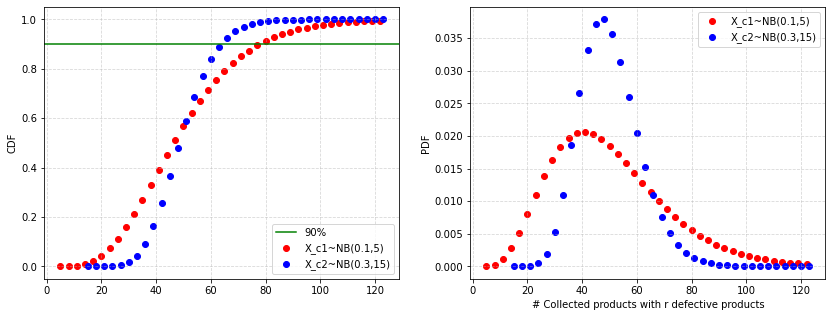

In [41]:
# TODO[]: explain the difference

C= 2.5
step = 3
X_c1_range = range(r_c1, round(X_c1.mean()*C), step)
X_c2_range = range(r_c2, round(X_c2.mean()*C), step)


fig, ax = plt.subplots(1, 2, figsize=(14,5))

# CDF plot
ax[0].scatter(X_c1_range, X_c1.cdf(X_c1_range), c='r')
ax[0].scatter(X_c2_range, X_c2.cdf(X_c2_range), c='b')

ax[0].axhline(prob3, c='g');

ax[0].grid(alpha=0.5, linestyle='dashed')
ax[0].legend(['90%', f'X_c1~NB({p3x},{r_c1})', f'X_c2~NB({p4x},{r_c2})']);

ax[0].set_ylabel("CDF")

# PDF plot
ax[1].scatter(X_c1_range, X_c1.pmf(X_c1_range), c='r')
ax[1].scatter(X_c2_range, X_c2.pmf(X_c2_range), c='b')

ax[1].grid(alpha=0.5, linestyle='dashed')
ax[1].legend([f'X_c1~NB({p3x},{r_c1})', f'X_c2~NB({p4x},{r_c2})']);

ax[1].set_xlabel('# Collected products with r defective products')
ax[1].set_ylabel("PDF")


let's calculate the mean and the variance of each case:

In [42]:
print(f'Mean of the distribution C1: {X_c1.mean()}')
print(f'Mean of the distribution C2: {X_c2.mean()}')
print(f'Variance of the distribution C1: {X_c1.var()}')
print(f'Variance of the distribution C2: {X_c2.var()}')

Mean of the distribution C1: 50.0
Mean of the distribution C2: 50.0
Variance of the distribution C1: 450.0
Variance of the distribution C2: 116.66666666666667


like we can see the mean is equal (the defective items and the probability are 3 times larger more in C2 than C1),
while V(X_c2) < V(X_c1) - this means that the critical mass of X_c2 is more centered around its mean, like we see in the graph 
so it makes sense that Y will reach 90% first.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

In [43]:
np.zeros((1, 6))

array([[0., 0., 0., 0., 0., 0.]])

In [44]:
def generate_dist(name, population, mean_rent, median_rent, iqr_factor=None, level_rcu_jump=100, print_stat=True):
    # iqr_factor affects only if mean_rent > median_rent
    
    rents = np.zeros((population,), dtype=int)
    median_upper_ind = round(population/2)
    median_lower_ind = round(population/2)-1
    median_idc = np.array(range(median_lower_ind,median_upper_ind+1))
    
    dist_from_mean = 0
    keep_mean = False
    
    iP25 = population*0.25
    iP75 = population*0.75
    
    rng = np.random.default_rng()
    for i in range(round(population/2)):
        delta = mean_rent-median_rent
        if delta > 0:
            rents[median_lower_ind - i] = median_rent
            if not keep_mean:
                dist_from_mean -= mean_rent - rents[median_lower_ind - i]
            
            if dist_from_mean < 0 and not keep_mean:
                # fix mode
                rents[median_upper_ind + i] = min(median_rent + level_rcu_jump * i, median_rent*iqr_factor) \
                                              if i < (population/4) else \
                                              median_rent*iqr_factor + level_rcu_jump * (i-(population/4))
                dist_from_mean -= mean_rent - rents[median_upper_ind + i]
                if dist_from_mean >= 0:
                    if rents[median_lower_ind - i] - dist_from_mean >= 0:
                        rents[median_lower_ind - i] -= dist_from_mean
                    else:
                        # we don't want negative rent values so we spread the leftovers of dist_from_mean over a few values
                        j = 0
                        while dist_from_mean:
                            rents[median_lower_ind - i + j] -= level_rcu_jump
                            dist_from_mean -= level_rcu_jump
                            j += 1
                            
                    dist_from_mean = 0
                    keep_mean = True
            else:
                rents[median_upper_ind + i] = mean_rent + delta

        else: # delta <= 0 
            rents[median_upper_ind + i] = median_rent
            if not keep_mean:
                dist_from_mean -= mean_rent - rents[median_upper_ind + i]
                
            if dist_from_mean > 0 and not keep_mean:
                # fix mode
                rents[median_lower_ind - i] = median_rent - level_rcu_jump * i
                dist_from_mean -= mean_rent - rents[median_lower_ind - i]
                if dist_from_mean <= 0:
                    rents[median_upper_ind + i] += dist_from_mean
                    dist_from_mean = 0
                    keep_mean = True
            else:
                rents[median_lower_ind - i] = mean_rent + delta
    
    if print_stat:
        print(f'Stats for {name}: population={population}, mean_rent={rents.mean()}, ' 
              f'median_rent={np.median(rents)}, iqr_rent={stats.iqr(rents)}')
    
    return rents
    

In [45]:
SH = generate_dist(name='Stochastic Heights', population=16000, mean_rent=6300, median_rent=4600, iqr_factor=5000/4600)
RG = generate_dist(name='Random Grove', population=22000, mean_rent=4200, median_rent=4600)

Stats for Stochastic Heights: population=16000, mean_rent=6300.0, median_rent=4600.0, iqr_rent=400.0
Stats for Random Grove: population=22000, mean_rent=4200.0, median_rent=4600.0, iqr_rent=800.0


#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

Text(0, 0.5, 'Rent Price')

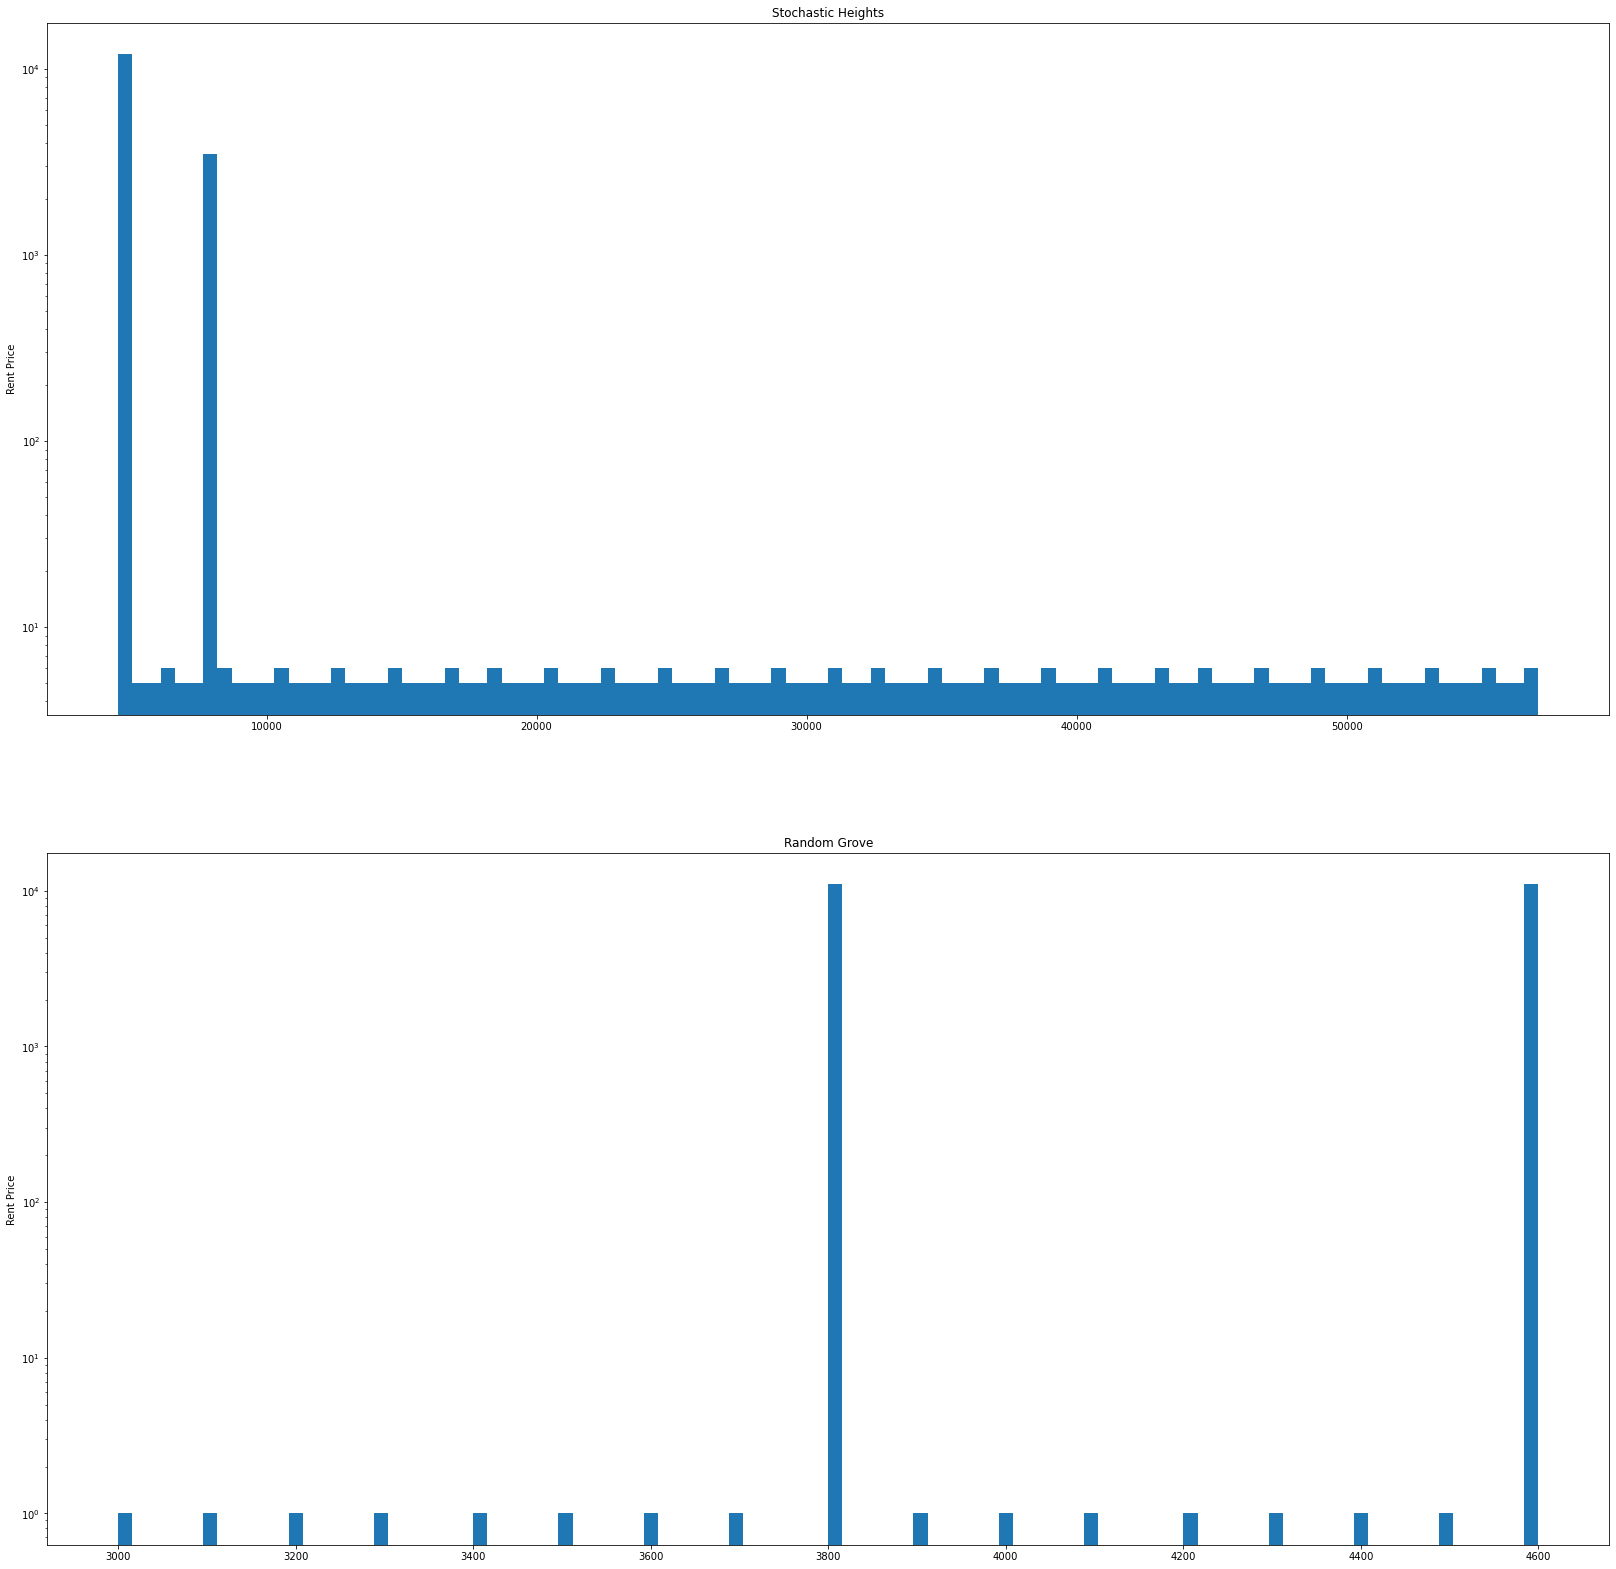

In [46]:
fig, axes = plt.subplots(2,1, figsize=(28,28))
axes[0].hist(SH, bins=100, log=True);
axes[1].hist(RG, bins=100, log=True);
axes[0].set_title('Stochastic Heights')
axes[0].set_ylabel("Rent Price")
axes[1].set_title('Random Grove')
axes[1].set_ylabel("Rent Price")


#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [47]:
# it is already satisffied by 2.A data
print(f'SH variance: {SH.var()}')
print(f'RG variance: {RG.var()}')

SH variance: 29895681.25
RG variance: 160185.45454545456


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [48]:
def covariance_rent_and_PHI(name,rent,phi,alpha):
    np_cov = np.cov(rent, phi)[0, 1]
    expected_cov = alpha * math.sqrt(np.var(rent)) * math.sqrt(np.var(phi))
    print(f"Stats for {name}: covariance={np_cov/expected_cov*100}")

In [49]:
SH_PHI = generate_dist(name='Stochastic Heights PHI', population=16000, mean_rent=12500, median_rent=12000,iqr_factor=0.51)
RG_PHI = generate_dist(name='Random Grove PHI', population=22000, mean_rent=8500, median_rent=8000,iqr_factor=1.1144)

Stats for Stochastic Heights PHI: population=16000, mean_rent=12500.0, median_rent=12000.0, iqr_rent=5880.0
Stats for Random Grove PHI: population=22000, mean_rent=8500.0, median_rent=8000.0, iqr_rent=915.0


In [50]:
covariance_rent_and_PHI('Stochastic Heights',SH,SH_PHI,0.97)
covariance_rent_and_PHI('Random Grove',RG,RG_PHI,0.89)

Stats for Stochastic Heights: covariance=52.89204616607659
Stats for Random Grove: covariance=89.48195004273812


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

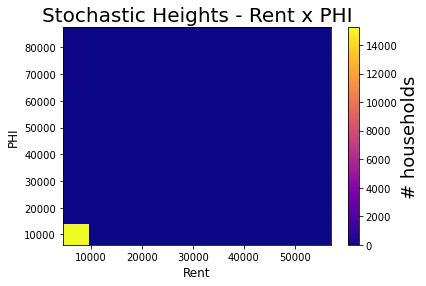

In [53]:
#heatmap SH
plt.hist2d(SH, SH_PHI, cmap='plasma')
cb = plt.colorbar()
cb.set_label('# households', fontsize=18)
plt.title("Stochastic Heights - Rent x PHI", fontsize=20)
plt.xlabel('Rent', fontsize=12)
plt.ylabel('PHI', fontsize=12)
plt.show()

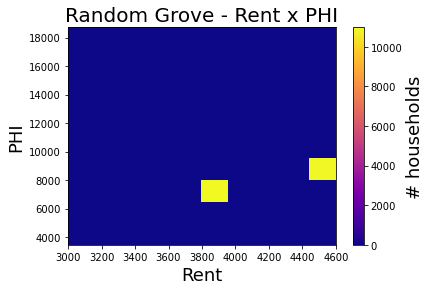

In [54]:
#heatmap RG
#heatmap
plt.hist2d(RG, RG_PHI, cmap='plasma')
cb = plt.colorbar()
cb.set_label('# households', fontsize=18)
plt.title("Random Grove - Rent x PHI", fontsize=20)
plt.xlabel('Rent', fontsize=18)
plt.ylabel('PHI', fontsize=18)
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

#### Empirical centralized third moment of $Y$ calulation

In [150]:
n = 20
p_vec = np.array([0.2, 0.1, 0.1, 0.1, 0.2, 0.3])
rng = np.random.default_rng()

def gen_Y(k):
    X = rng.multinomial(n, p_vec, size=k)
    Y = np.sum(X[:,1:4], axis=1)
    mu_Y = Y.mean()
    pdf_Y = [sum(Y==y)/Y.shape[0] for y in range(n+1)]
    return pdf_Y, mu_Y

$$\gamma_3=E((Y-\mu(Y))^3)=\sum_{y{\in}Y}(y-\mu(Y))^{3}p(y) \\
y\in[0,20]$$

In [161]:
def empirical_g3(k):
    pdf_Y, mu_Y = gen_Y(k)
    return sum( [((y-mu_Y)**3)*pdf_Y[y] for y in range(n+1)] )

In [162]:
k=100
empirical_g3(k)

2.7778140000000042

#### Centralized third moment of $Y$ as we calculated in class

$$Y\sim Binom(n,p=p_2+p_3+p_4) \\
\Rightarrow \gamma_3=np(1-p)(1-2p)$$

In [131]:
p_Y = sum(p_vec[1:4])
g3 = n*p_Y*(1-p_Y)*(1-2*p_Y)

In [132]:
g3

1.6799999999999997

The reason why empirical_g3!=g3 lies in the number of experiments we selected for this test ($k=100$). If we want more accourated empirical result, with no jiter, we must use a larger $k$. See demonstration in the following plot.

Text(0, 0.5, 'Empirical gamma3')

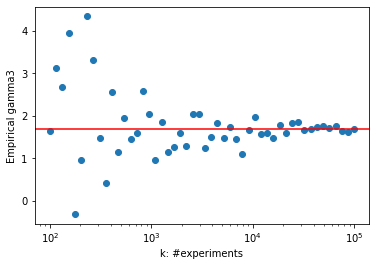

In [190]:
k_values = np.round(np.logspace(2, 5, base=10)).astype(int)
empirical_g3_values = [empirical_g3(k) for k in k_values]

fig, ax = plt.subplots()
ax.scatter(k_values, empirical_g3_values)
ax.set_xscale('log')
ax.axhline(g3, c='r');
ax.set_xlabel('k: #experiments')
ax.set_ylabel("Empirical gamma3")

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

The variance definition: 
$$ V\left(X+Y+Z\right)=E\left(\left(X+Y+Z\right)^2\right)-\left(E\left(X+Y+Z\right)\right)^2 $$

Let's simplify this expression.
$$ V\left(X+Y+Z\right)= E\left(X^2 + XY + XZ + Y^2 + YX + YZ + Z^2 + ZX + ZY\right) - \left(E\left(X+Y+Z\right)\right)^2 $$

Using The linearity of the expectation:
$$ 
= E\left(X^2\right) + E\left(XY\right) + E\left(XZ\right) + E\left(Y^2\right) + E\left(YX\right) + E\left(YZ\right) + E\left(Z^2\right) + E\left(ZX\right) + E\left(ZY\right) - \left(E\left(X\right)+E\left(Y\right)+E\left(Z\right)\right)^2 \\
= E\left(X^2\right) + E\left(Y^2\right) + E\left(Z^2\right) + 2E\left(XY\right) + 2E\left(XZ\right) + 2E\left(YZ\right) - \left(E\left(X\right)\right)^2 - \left(E\left(Y\right)\right)^2 - \left(E\left(Z\right)\right)^2 -2E\left(X\right)E\left(Y\right) - 2E\left(X\right)E\left(Z\right) -2E\left(Y\right)E\left(Z\right) \\
= E\left(X^2\right) - \left(E\left(X\right)\right)^2 + E\left(Y^2\right) - \left(E\left(Y\right)\right)^2 + E\left(Z^2\right) - \left(E\left(Z\right)\right)^2 + 2E\left(XY\right) -2E\left(X\right)E\left(Y\right) + 2E\left(XZ\right) - 2E\left(X\right)E\left(Z\right) + 2E\left(YZ\right) -2E\left(Y\right)E\left(Z\right)
$$

Recall that:
1. The variance definition for $X$ random variable is $ V\left(X\right)=E\left(X^2\right)-\left(E\left(X\right)\right)^2 $
2. The covariance definition for every $X,Y$ random variables is $Cov\left(X,Y\right)=E\left(XY\right)-E\left(X\right)E\left(Y\right)$


Hence, we get:
$$ V\left(X+Y+Z\right) 
= V\left(X\right)+ V\left(Y\right) + V\left(Z\right) + 2Cov\left(X,Y\right) + 2Cov\left(X,Z\right) + 2Cov\left(Y,Z\right)
$$

We proved at class that if $X,Y$ are statistically independent, then $E\left(XY\right)=E\left(Y\right)E\left(X\right)$

Therfore, if $X,Y,Z$ are pairwise independent we get:

$$ 
Cov\left(X,Y\right)=E\left(XY\right)-E\left(X\right)E\left(Y\right)=E\left(Y\right)E\left(X\right) - E\left(X\right)E\left(Y\right)=0 \\
Cov\left(X,Z\right)=E\left(XZ\right)-E\left(X\right)E\left(Z\right)=E\left(Z\right)E\left(X\right) - E\left(X\right)E\left(Z\right)=0 \\
Cov\left(Y,Z\right)=E\left(YZ\right)-E\left(Y\right)E\left(Z\right)=E\left(Z\right)E\left(Y\right) - E\left(Y\right)E\left(Z\right)=0 \\
$$

In this case, the variance of the sum will be:
$$ V\left(X+Y+Z\right) = V\left(X\right)+ V\left(Y\right) + V\left(Z\right)
$$



If $X,Y,Z$ are pairwise independent, are they necessarily collectively independent? **NO**, it depends on the sample space that $X,Y,Z$ are defined on. let's see a negative example.

Define 
$\Omega=\left\{FFS, FSF, SSS, SFF\right\}$

Each sample is a row of 3 experiments. An experiment result can be $S$uccess or $F$ail.

$X,Y,Z$- count the number of Success in the corresponding experiment 1st,2nd,3rd
The probabilities observed on the sample space:
$$
P\left(X=S\right)=0.5 \\
P\left(Y=S\right)=0.5 \\
P\left(Z=S\right)=0.5 \\
P\left(X=S,Y=S\right)=0.25 \\
P\left(X=S,Z=S\right)=0.25 \\
P\left(Y=S,Z=S\right)=0.25 \\
$$ 

We notice that 
$$
P\left(X=S\right)P\left(Y=S\right)=0.5\cdot0.5=0.25 \Rightarrow X,Y independent \\
P\left(X=S\right)P\left(Z=S\right)=0.5\cdot0.5=0.25 \Rightarrow X,Z independent \\
P\left(Y=S\right)P\left(Z=S\right)=0.5\cdot0.5=0.25 \Rightarrow Y,Z independent \\
$$

However, 
$$ 
P\left(X=S,Y=S,Z=S\right)=0.25 \\
P\left(X=S\right)P\left(Y=S\right)P\left(Z=S\right)=0.5^3=0.125 \\
P\left(X=S,Y=S,Z=S\right) \ne P\left(X=S\right)P\left(Y=S\right)P\left(Z=S\right) \\
$$

Hence, $X,Y,Z$ are not independent




### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [51]:
# since we implemented NFoldConv with recursion, and each recursion layer calculates many times the same values,
# we can store those repeatitive values in a cache and not calculating them from scratch each time.
conv_cache = {}
def NFoldConv(P, n):
    if n==1:
        return lambda x: P.pmf(x)

    # return the convoution between P to the other sum of n-1 independent variables
    def convolve_multiple_rv(x):
        if (n, x) in conv_cache:
            return conv_cache[(n, x)]
        else:
            pmf = sum([ NFoldConv(P, n-1)(x-v) * P.pmf(v) for v in range(P.a, P.b+1)]) 
            conv_cache[(n, x)] = pmf
            return pmf
    return convolve_multiple_rv
    

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


Text(0.5, 0, 'Q possible values')

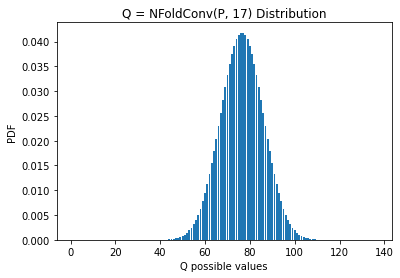

In [50]:
# X - a random variable that indicates whether the octahedron fell on its i-th face
# X gets values from [1,2,3,4,5,6,7,8]
# P(X) = 1/8
n_faces = 8
p = 1/n_faces
P = stats.rv_discrete(values=(range(1,n_faces+1), np.repeat(p, n_faces)))
n=17

Q = NFoldConv(P, n)

# Calculating Q distribution
pos_vals_Q = np.array(range(1, n*n_faces+1))
distribution_Q = [Q(val) for val in pos_vals_Q]

fig, axes = plt.subplots()
axes.bar(pos_vals_Q, distribution_Q);
axes.set_title("Q = NFoldConv(P, 17) Distribution")
axes.set_ylabel("PDF")
axes.set_xlabel("Q possible values")